In [92]:
import numpy as np
from basic_css_code import construct_HGP_code

H = np.array([[1, 1, 0],
              [0, 1, 1]
], dtype=int)

Hx, Hz = construct_HGP_code(H)
print("H:")
print(H)
print("Hx shape:", Hx.shape)
print("Hx:")
print(Hx.toarray())
print("Hz shape:", Hz.shape)
print("Hz:")
print(Hz.toarray())


Hx shape: (6, 13)
Hz shape: (6, 13)
Hx:
[[1 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 1 0 0]
 [0 0 1 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 1 0 0 0 1 1]
 [0 0 0 0 0 1 0 0 1 0 0 0 1]]
Hz:
[[1 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 1]]
H:
[[1 1 0]
 [0 1 1]]
Hx shape: (6, 13)
Hx:
[[1 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 1 0 0]
 [0 0 1 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 1 0 0 0 1 1]
 [0 0 0 0 0 1 0 0 1 0 0 0 1]]
Hz shape: (6, 13)
Hz:
[[1 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 1]]


In [93]:
import networkx as nx

num_qubits = Hz.shape[1]
num_checks = Hz.shape[0]

DG = nx.DiGraph()
# Add data nodes
DG.add_nodes_from([f"d_{i}" for i in np.arange(num_qubits)])
# Add check nodes
DG.add_nodes_from([f"c_{i}" for i in np.arange(num_checks)])

print(list(DG.nodes))
print(list(DG.edges))

for i in range(num_checks):
    for j in range(num_qubits):
        if Hz[i, j] == 1:
            DG.add_edge(f"c_{i}", f"d_{j}")
            print(f"Edges in Hz: {list(DG.edges())}")

['d_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'c_0', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5']
[]
Edges in Hz: [('c_0', 'd_0')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1'), ('c_0', 'd_9')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1'), ('c_0', 'd_9'), ('c_1', 'd_1')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1'), ('c_0', 'd_9'), ('c_1', 'd_1'), ('c_1', 'd_2')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1'), ('c_0', 'd_9'), ('c_1', 'd_1'), ('c_1', 'd_2'), ('c_1', 'd_10')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1'), ('c_0', 'd_9'), ('c_1', 'd_1'), ('c_1', 'd_2'), ('c_1', 'd_10'), ('c_2', 'd_3')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1'), ('c_0', 'd_9'), ('c_1', 'd_1'), ('c_1', 'd_2'), ('c_1', 'd_10'), ('c_2', 'd_3'), ('c_2', 'd_4')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1'), ('c_0', 'd_9'), ('c_1', 'd_1'), ('c_1', 'd_2'), ('c_1', 'd_10'), ('c_2', 'd_3'), ('c_2', 'd_4'), ('c_2', 'd_9')]
Edges in H

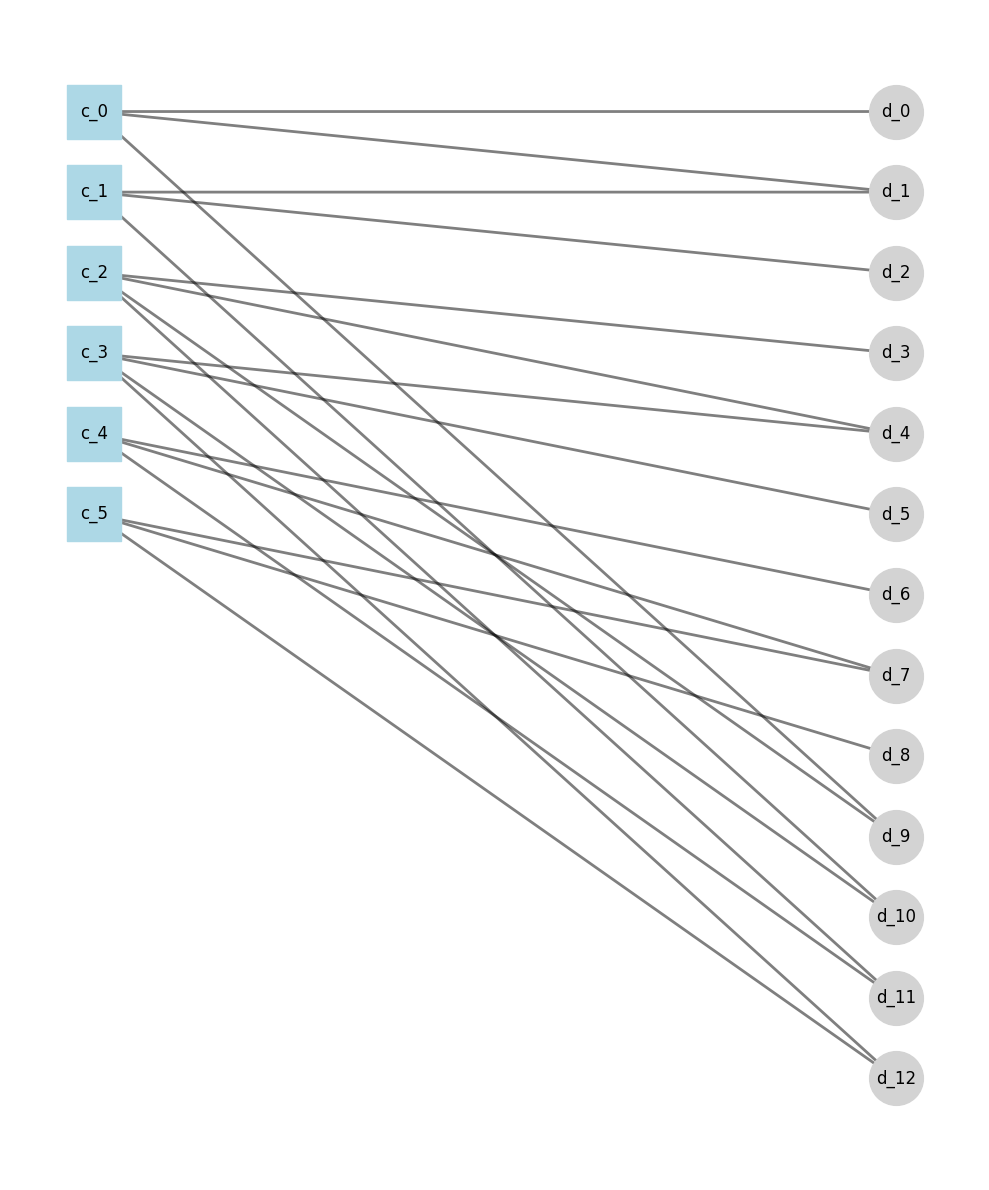

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
vertical_spacing = 2400

pos = {}
for i in range(num_checks):
    pos[f"c_{i}"] = (0, -i * vertical_spacing)  # x = 0, spread vertically
for i in range(num_qubits):
    pos[f"d_{i}"] = (1, -i * vertical_spacing)  # x = 1, align with similar vertical spacing

# Draw nodes
nx.draw_networkx_nodes(DG, pos, nodelist=[f"d_{i}" for i in np.arange(num_qubits)],
                       node_color='lightgrey', node_size=1500, node_shape='o')
nx.draw_networkx_nodes(DG, pos, nodelist=[f"c_{i}" for i in np.arange(num_checks)],
                       node_color='lightblue', node_size=1500, node_shape='s')

# Draw edges
nx.draw_networkx_edges(DG, pos, edgelist=DG.edges(), width=2, alpha=0.5, edge_color='black')

# Add labels
labels = {f"d_{i}": f"d_{i}" for i in np.arange(num_qubits)}
labels.update({f"c_{i}": f"c_{i}" for i in np.arange(num_checks)})
nx.draw_networkx_labels(DG, pos, labels, font_size=12, font_color="black")

plt.axis("off")
plt.tight_layout()
plt.show()


Shape of H: (15, 20)
Binary matrix H:
[[1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1]
 [0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]]
Nodes in the graph: ['d_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 'd_16', 'd_17', 'd_18', 'd_19', 'c_0', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9', 'c_10', 'c_11', 'c_12', 'c_13', 'c_14']
Edges in the graph: [('c_0', 'd_0')

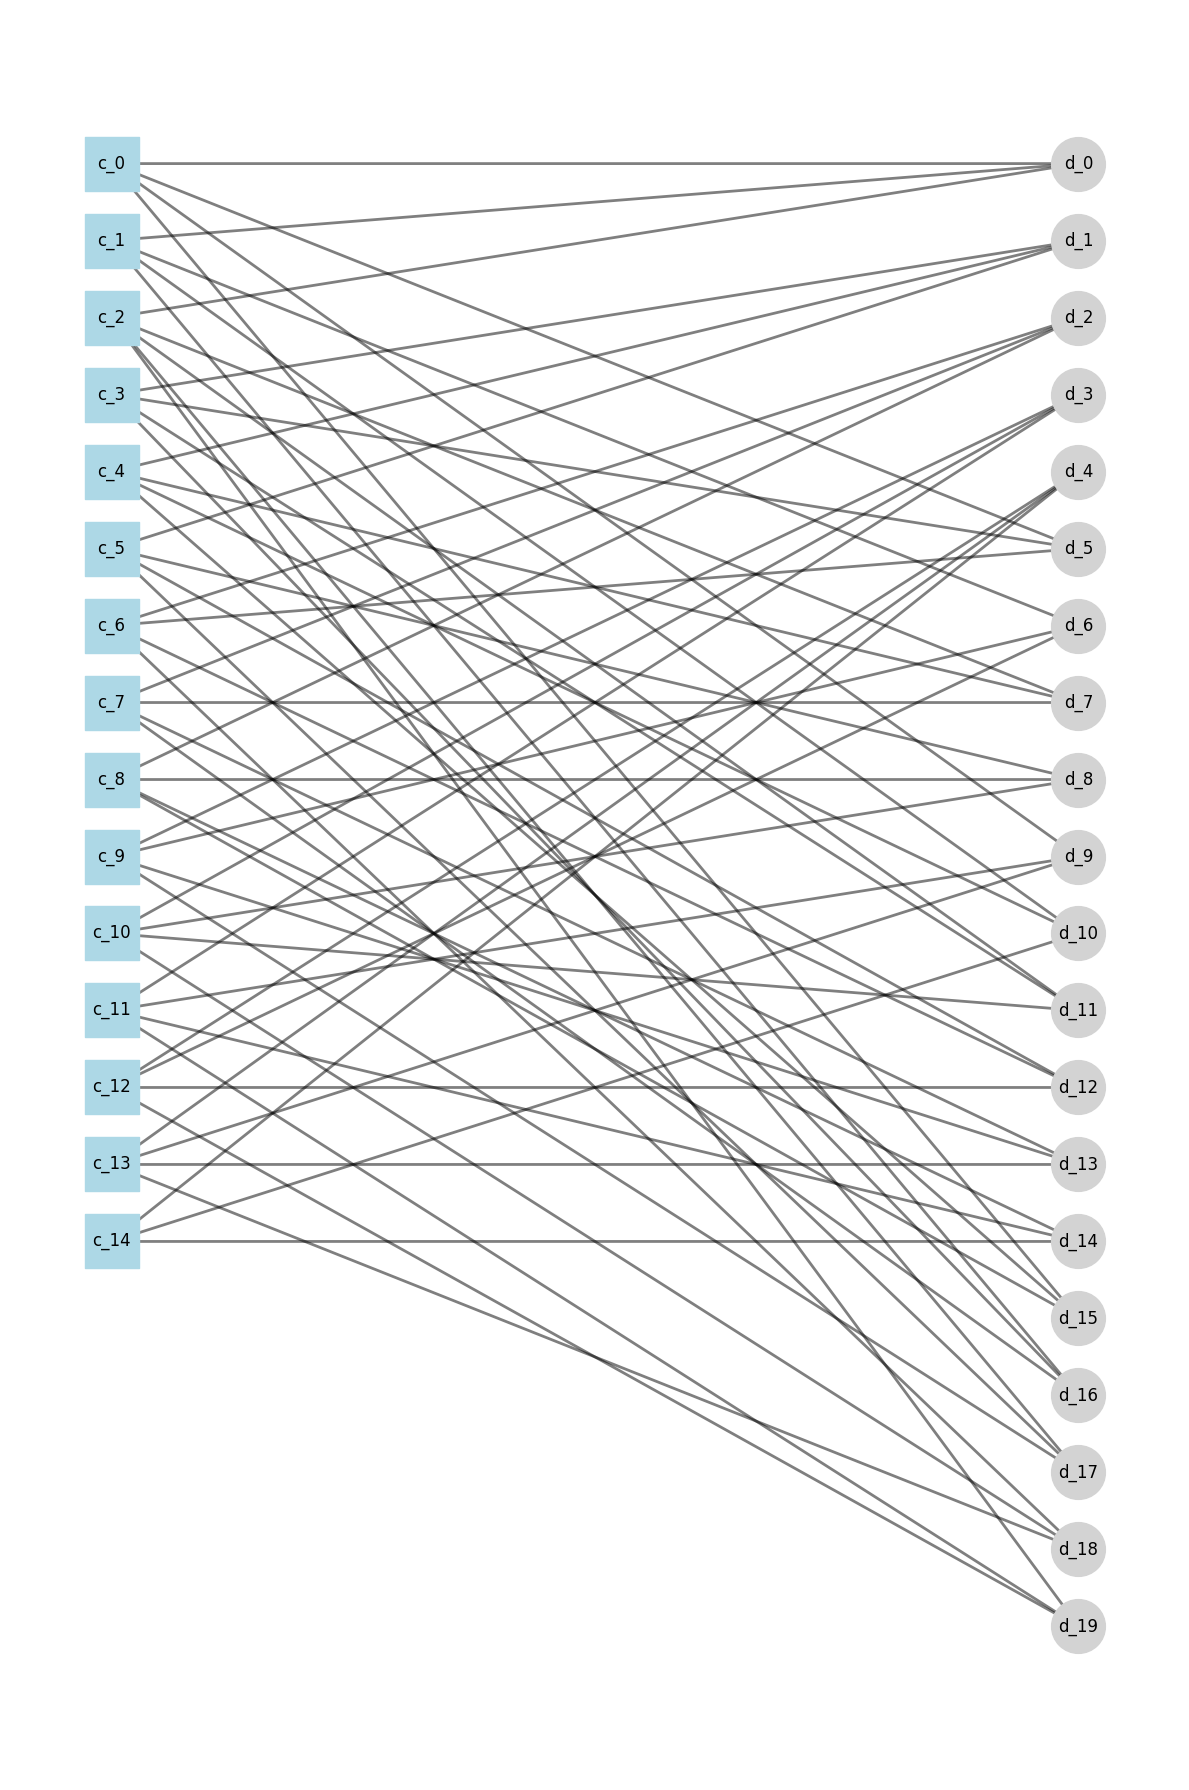

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Provided input as raw multiline string
# index_input = """
# 15 20
# 0 9 5 15 
# 0 16 10 6 
# 0 7 11 17 19 
# 16 1 11 5 
# 1 10 15 7 
# 8 1 12 17 
# 2 18 12 5 
# 16 2 13 7 
# 8 2 14 15 
# 17 3 13 6 
# 8 11 18 3 
# 19 9 3 14 
# 19 4 12 6 
# 9 18 4 13 
# 10 4 14 
# """

filename = "./initial_codes/HGP_(3,4)_[625,25].txt"

with open(filename, 'r') as f:
    lines = f.read().strip().split('\n')

# Parse the input
num_checks, num_qubits = map(int, lines[0].split())

H = np.zeros((num_checks, num_qubits), dtype=int)

for i, line in enumerate(lines[1:]):
    indices = list(map(int, line.strip().split()))
    for j in indices:
        H[i, j] = 1

print("Shape of H:", H.shape)
print("Binary matrix H:")
print(H)

check_connections = [list(map(int, line.split())) for line in lines[1:]]

# Build graph
DG = nx.DiGraph()

# Add data and check nodes
DG.add_nodes_from([f"d_{i}" for i in range(num_qubits)])
DG.add_nodes_from([f"c_{i}" for i in range(num_checks)])

# Add edges based on check_connections
for c_idx, data_indices in enumerate(check_connections):
    for d_idx in data_indices:
        DG.add_edge(f"c_{c_idx}", f"d_{d_idx}")

print("Nodes in the graph:", list(DG.nodes))
print("Edges in the graph:", list(DG.edges))

# Step 3: Define layout
vertical_spacing = 2400
pos = {}

for i in range(num_checks):
    pos[f"c_{i}"] = (0, -i * vertical_spacing)
for i in range(num_qubits):
    pos[f"d_{i}"] = (1, -i * vertical_spacing)

# Step 4: Draw graph
plt.figure(figsize=(12, 18))

nx.draw_networkx_nodes(DG, pos, nodelist=[f"d_{i}" for i in range(num_qubits)],
                       node_color='lightgrey', node_size=1500, node_shape='o')
nx.draw_networkx_nodes(DG, pos, nodelist=[f"c_{i}" for i in range(num_checks)],
                       node_color='lightblue', node_size=1500, node_shape='s')

nx.draw_networkx_edges(DG, pos, edgelist=DG.edges(), width=2, alpha=0.5, edge_color='black')

# Add labels
labels = {f"d_{i}": f"d_{i}" for i in np.arange(num_qubits)}
labels.update({f"c_{i}": f"c_{i}" for i in np.arange(num_checks)})
nx.draw_networkx_labels(DG, pos, labels, font_size=12, font_color="black")

plt.axis("off")
plt.tight_layout()
plt.show()


In [8]:
hgpcode = np.array([[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

if np.array_equal(H, hgpcode):
    print("same")
else:
    print("different")


same


In [9]:
# tanner_utils.py
from pathlib import Path
from typing import List, Tuple, Union, Literal, Optional
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def load_incidence_file(path: Union[str, Path], *, one_based: bool=False
                        ) -> Tuple[np.ndarray, List[List[int]]]:
    """
    Read an incidence-list parity-check file:
        m n
        j1 j2 ...
        ...

    one_based=True if the file lists qubits as 1..n (will shift to 0..n-1).
    Returns:
      H (m x n) binary np.ndarray, and the raw connections per row.
    """
    path = Path(path)
    lines = [ln.strip() for ln in path.read_text().splitlines() if ln.strip()]
    m, n = map(int, lines[0].split())
    rows = []
    for ln in lines[1:1+m]:
        idxs = list(map(int, ln.split()))
        if one_based:
            idxs = [j-1 for j in idxs]
        rows.append(idxs)

    if len(rows) != m:
        raise ValueError(f"Header says {m} rows but file has {len(rows)} rows after header.")

    H = np.zeros((m, n), dtype=int)
    for r, idxs in enumerate(rows):
        for j in idxs:
            if not (0 <= j < n):
                raise ValueError(f"Index out of range in row {r}: {j} (valid 0..{n-1})")
            H[r, j] = 1
    return H, rows

def build_tanner(connections: List[List[int]], m: int, n: int, directed: bool=True):
    G = nx.DiGraph() if directed else nx.Graph()
    G.add_nodes_from([f"c_{i}" for i in range(m)], bipartite=0, kind="check")
    G.add_nodes_from([f"d_{j}" for j in range(n)], bipartite=1, kind="data")
    for ci, dlist in enumerate(connections):
        for dj in dlist:
            G.add_edge(f"c_{ci}", f"d_{dj}")
    return G

def draw_tanner(G, m: int, n: int,
                orientation: Literal["vertical","horizontal"]="vertical",
                spacing: float=0.6, node_size: int=600, font_size: int=10,
                with_labels: bool=True, save_path: Optional[Union[str,Path]]=None,
                show: bool=True):
    # simple 2-layer positions
    if orientation == "vertical":
        pos = {**{f"c_{i}": (0, -i*spacing) for i in range(m)},
               **{f"d_{j}": (1, -j*spacing) for j in range(n)}}
    else:
        pos = {**{f"c_{i}": (-i*spacing, 0) for i in range(m)},
               **{f"d_{j}": (-j*spacing, -1) for j in range(n)}}

    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, [f"c_{i}" for i in range(m)],
                           node_shape="s", node_color="lightblue",
                           node_size=node_size, edgecolors="black", linewidths=0.5)
    nx.draw_networkx_nodes(G, pos, [f"d_{j}" for j in range(n)],
                           node_shape="o", node_color="lightgrey",
                           node_size=node_size, edgecolors="black", linewidths=0.5)
    nx.draw_networkx_edges(G, pos, width=1.6, alpha=0.7)
    if with_labels:
        labels = {n:n for n in G.nodes}
        nx.draw_networkx_labels(G, pos, labels, font_size=font_size)
    plt.axis("off"); plt.tight_layout()
    if save_path: plt.savefig(save_path, dpi=150, bbox_inches="tight")
    if show: plt.show()
    else: plt.close()

def visualize_incidence_file(path: Union[str,Path], **draw_kwargs):
    H, rows = load_incidence_file(path, one_based=False)
    G = build_tanner(rows, *H.shape, directed=True)
    draw_tanner(G, *H.shape, **draw_kwargs)
    return H, G


In [25]:
from pathlib import Path
import numpy as np

# 1) Incidence-list loader (your .txt files)
def load_incidence_file(path: str | Path) -> np.ndarray:
    lines = Path(path).read_text().strip().splitlines()
    m, n = map(int, lines[0].split())
    H = np.zeros((m, n), dtype=int)
    for i, ln in enumerate(lines[1:1+m]):
        for j in map(int, ln.split()):
            H[i, j] = 1
    return H

# 2) Dense 0/1 block parser (paste from PEG)
def parse_dense_matrix(raw: str, dtype=int) -> np.ndarray:
    # Remove blank lines, detect column count from first line
    lines = [ln for ln in raw.strip().splitlines() if ln.strip()]
    ncols = len(lines[0].split())
    # Fast parse with fromstring (vectorized and ~O(N))
    data = np.fromstring(" ".join(lines), dtype=dtype, sep=" ")
    if data.size % ncols != 0:
        raise ValueError("Row/column mismatch in pasted matrix.")
    return data.reshape(-1, ncols)

# 3) Robust comparator with diffs
def compare_mats(name: str, A: np.ndarray, B: np.ndarray, max_show: int = 12) -> bool:
    if A.shape != B.shape:
        print(f"[{name}] shape mismatch: {A.shape} vs {B.shape}")
        return False
    same = np.array_equal(A, B)
    print(f"[{name}] {'SAME' if same else 'DIFFERENT'}")
    if not same:
        r, c = np.where(A != B)
        k = min(max_show, r.size)
        print(f"  {r.size} mismatched entries; first {k}:")
        for i in range(k):
            print(f"  (r={r[i]}, c={c[i]}): ref={A[r[i], c[i]]}, sim={B[r[i], c[i]]}")
    return same


In [26]:
raw_625 = """
1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1
0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
"""

raw_1225 = """
1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0
0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0
0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
"""  

raw_1600 = """
1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
"""

raw_2025 = """
1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
"""

In [27]:
# Reference H from your files
H_625  = load_incidence_file("./initial_codes/HGP_(3,4)_[625,25].txt")
H_1225 = load_incidence_file("./initial_codes/HGP_(3,4)_[1225,65].txt")
H_1600 = load_incidence_file("./initial_codes/HGP_(3,4)_[1600,64].txt")
H_2025 = load_incidence_file("./initial_codes/HGP_(3,4)_[2025,81].txt")

# Parse PEG outputs (raw strings you pasted)
H_sim_625  = parse_dense_matrix(raw_625)
H_sim_1225 = parse_dense_matrix(raw_1225)
H_sim_1600 = parse_dense_matrix(raw_1600)
H_sim_2025 = parse_dense_matrix(raw_2025)

# Compare (with helpful diffs on failure)
compare_mats("625×20",  H_625,  H_sim_625)
compare_mats("1225 case", H_1225, H_sim_1225)
compare_mats("1600 case", H_1600, H_sim_1600)
compare_mats("2025 case", H_2025, H_sim_2025)


[625×20] SAME
[1225 case] SAME
[1600 case] SAME
[2025 case] SAME


True